# Select fitted distributions

In this example help to make a choice between several distributions fitted to a sample.

Several methods can be used:

- the ranking by the Kolmogorov p-values (for continuous distributions),
- the ranking by the ChiSquared p-values (for discrete distributions),
- the ranking by BIC values.

In [1]:
from __future__ import print_function
import openturns as ot

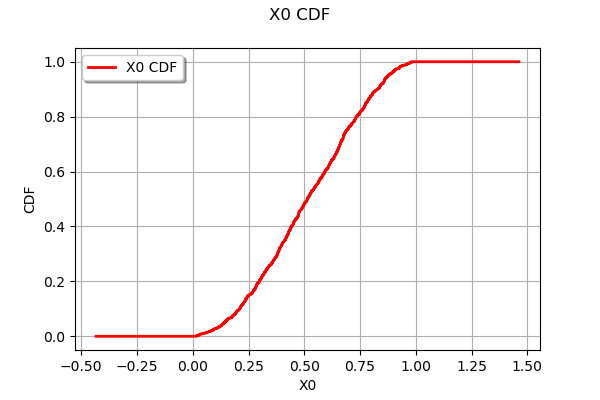

In [2]:
# Create a sample from a continuous distribution
distribution = ot.Beta(2.0, 2.0, 0.0, 1.)
sample = distribution.getSample(1000)
ot.UserDefined(sample).drawCDF()

**1. Specify the model only**

In [3]:
# Create the list of distribution estimators
factories = [ot.BetaFactory(), ot.TriangularFactory()]

In [4]:
# Rank the continuous models by the Kolmogorov p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelKolmogorov(sample, factories)
test_result

class=TestResult name=Unnamed type=Kolmogorov Beta binaryQualityMeasure=true p-value threshold=0.5 p-value=0.7 statistic=0.0152829 description=[Beta(alpha = 1.82673, beta = 1.69512, a = 0.0117009, b = 0.983794) vs sample Beta]

In [5]:
# Rank the continuous models wrt the BIC criteria (no test result):
ot.FittingTest.BestModelBIC(sample, factories)

[class=Beta name=Beta dimension=1 alpha=1.82673 beta=1.69512 a=0.0117009 b=0.983794,
 -0.1828338429879409]

In [6]:
# Rank the continuous models wrt the AIC criteria (no test result):
ot.FittingTest.BestModelAIC(sample, factories)

[class=Beta name=Beta dimension=1 alpha=1.82673 beta=1.69512 a=0.0117009 b=0.983794,
 -0.20246486410386944]

In [7]:
# Rank the continuous models wrt the AICc criteria (no test result):
ot.FittingTest.BestModelAICC(sample, factories)

[class=Beta name=Beta dimension=1 alpha=1.82673 beta=1.69512 a=0.0117009 b=0.983794,
 -0.2024246630988443]

**2. Specify the model and its parameters**

In [8]:
# Create a collection of the distributions to be tested
distributions = [ot.Beta(2.0, 2.0, 0.0, 1.0), ot.Triangular(0.0, 0.5, 1.0)]

In [9]:
# Rank the continuous models by the Kolmogorov p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelKolmogorov(sample, distributions)
test_result

class=TestResult name=Unnamed type=Kolmogorov Beta binaryQualityMeasure=false p-value threshold=0.05 p-value=0.0291473 statistic=0.0458091 description=[Beta(alpha = 2, beta = 2, a = 0, b = 1) vs sample Beta]

In [10]:
# Rank the continuous models wrt the BIC criteria:
ot.FittingTest.BestModelBIC(sample, distributions)

[class=Beta name=Beta dimension=1 alpha=2 beta=2 a=0 b=1, -0.21016253990533829]

In [11]:
# Rank the continuous models wrt the AIC criteria:
ot.FittingTest.BestModelAIC(sample, distributions)

[class=Beta name=Beta dimension=1 alpha=2 beta=2 a=0 b=1, -0.21016253990533829]

In [12]:
# Rank the continuous models wrt the AICc criteria:
ot.FittingTest.BestModelAICC(sample, distributions)

[class=Beta name=Beta dimension=1 alpha=2 beta=2 a=0 b=1, -0.21016253990533829]

Nota: we notice the same value for `BIC`, `AIC`, `AICc`. Here the reason is that number of estimated parameters is 0, thus there is no penalty!

**Discrete distributions**

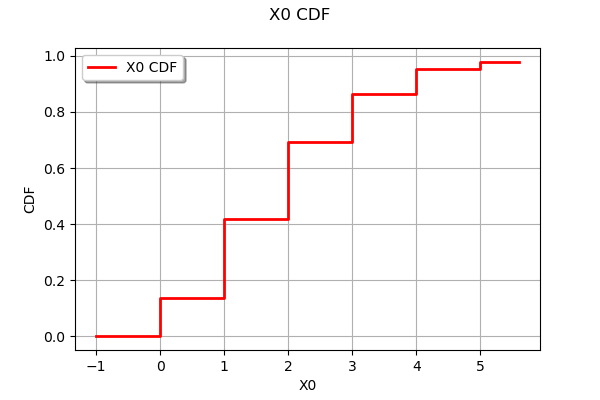

In [13]:
# Create a sample from a discrete distribution
distribution = ot.Poisson(2.0)
sample = distribution.getSample(1000)
ot.UserDefined(sample).drawCDF()

In [14]:
# Create the list of distribution estimators
distributions = [ot.Poisson(2.0), ot.Geometric(0.1)]

In [15]:
# Rank the discrete models wrt the ChiSquared p-values:
estimated_distribution, test_result = ot.FittingTest.BestModelChiSquared(sample, distributions)
test_result

class=TestResult name=Unnamed type=ChiSquared Poisson binaryQualityMeasure=true p-value threshold=0.05 p-value=0.480899 statistic=5.50462 description=[Poisson(lambda = 2) vs sample Poisson]

In [16]:
# Rank the discrete models wrt the BIC criteria:
ot.FittingTest.BestModelBIC(sample, distributions)

[class=Poisson name=Poisson dimension=1 lambda=2, 3.3929905411578307]